In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nl = pd.read_csv('data/nl_items.csv')
de = pd.read_csv('data/de_items.csv')
us = pd.read_csv('data/us_items.csv')

In [3]:
del nl['last_observed']
del de['last_observed']
del us['last_observed']

nl['first_observed'] = pd.to_datetime(nl['first_observed'])
de['first_observed'] = pd.to_datetime(de['first_observed'])
us['first_observed'] = pd.to_datetime(us['first_observed'])

nl['total_sales'] = pd.to_numeric(nl['total_sales'])
de['total_sales'] = pd.to_numeric(de['total_sales'])
us['total_sales'] = pd.to_numeric(us['total_sales'])

nl['ships_from'] = 'NL'
de['ships_from'] = 'DE'
us['ships_from'] = 'US'

df = nl.copy()
df = df.append(de)
df = df.append(us)

new_columns = df.columns.values
new_columns[1] = 'Country'
df.columns = new_columns

In [4]:
dfs = {}

dfs['agora'] = df.loc[df['marketplace'] == 'Agora']
dfs['blackmarket'] = df.loc[df['marketplace'] == 'Black Market Reloaded']
dfs['evolution'] = df.loc[df['marketplace'] == 'Evolution']
dfs['hydra'] = df.loc[df['marketplace'] == 'Hydra']
dfs['pandora'] = df.loc[df['marketplace'] == 'Pandora']
dfs['sroad_one'] = df.loc[df['marketplace'] == 'Silk Road 1']
dfs['sroad_two'] = df.loc[df['marketplace'] == 'Silk Road 2']

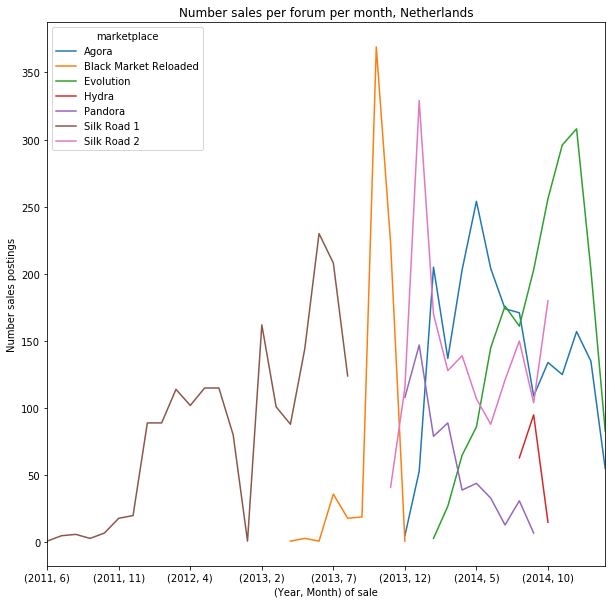

In [5]:
temp = nl.groupby([nl['first_observed'].dt.year, nl['first_observed'].dt.month, nl['marketplace']])
temp2 = temp.count()
ax = temp2.unstack(level=-1)['first_observed'].plot(kind='line', figsize = (10,10), title='Number sales per forum per month, Netherlands')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Number sales postings")

ax

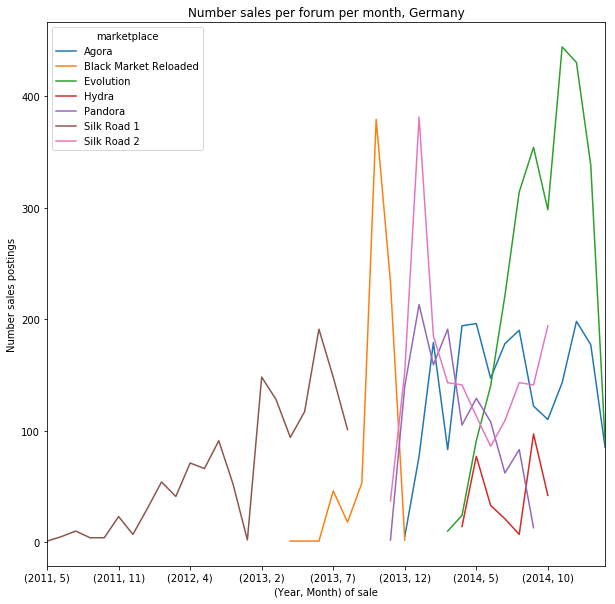

In [6]:
temp = de.groupby([de['first_observed'].dt.year, de['first_observed'].dt.month, de['marketplace']])
temp2 = temp.count()
ax = temp2.unstack(level=-1)['first_observed'].plot(kind='line', figsize = (10,10), title='Number sales per forum per month, Germany')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Number sales postings")

ax

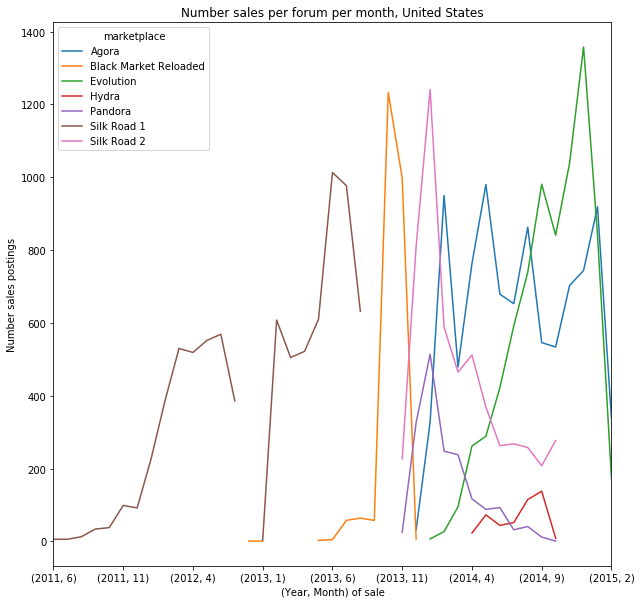

In [7]:
temp = us.groupby([us['first_observed'].dt.year, us['first_observed'].dt.month, us['marketplace']])
temp2 = temp.count()
ax = temp2.unstack(level=-1)['first_observed'].plot(kind='line', figsize = (10,10), title='Number sales per forum per month, United States')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Number sales postings")

ax

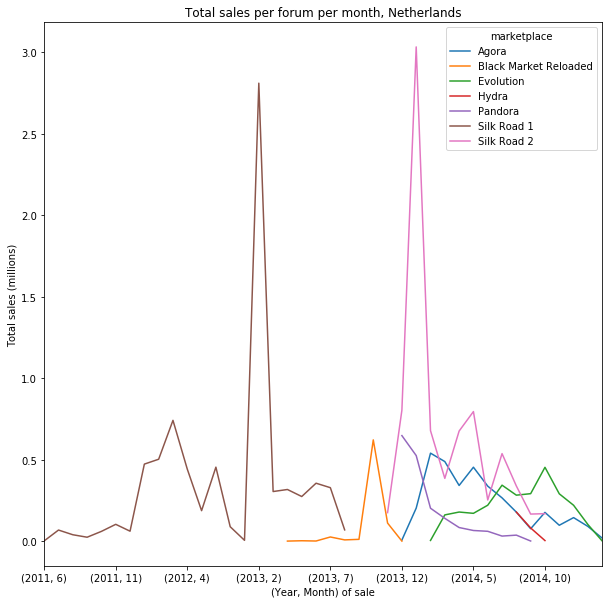

In [8]:
temp = nl.groupby([nl['first_observed'].dt.year, nl['first_observed'].dt.month, nl['marketplace']])
temp2 = temp.sum()/1000000
ax = temp2.unstack(level=-1)['total_sales'].plot(kind='line', figsize = (10,10), title='Total sales per forum per month, Netherlands')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Total sales (millions)")

ax

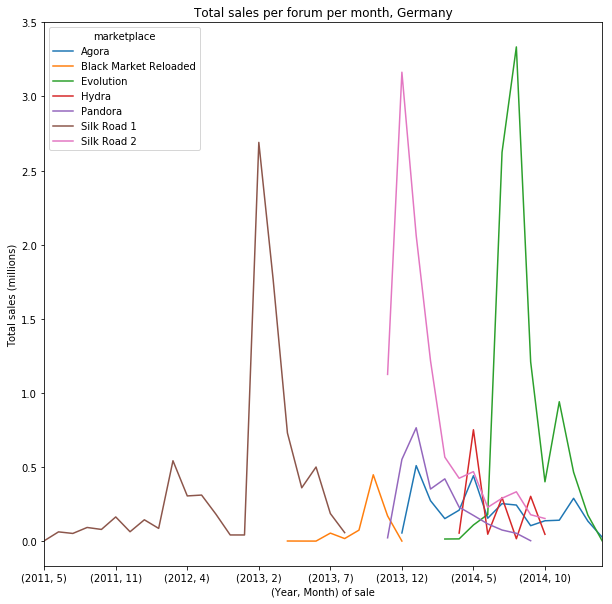

In [9]:
temp = de.groupby([de['first_observed'].dt.year, de['first_observed'].dt.month, de['marketplace']])
temp2 = temp.sum()/1000000
ax = temp2.unstack(level=-1)['total_sales'].plot(kind='line', figsize = (10,10), title='Total sales per forum per month, Germany')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Total sales (millions)")

ax

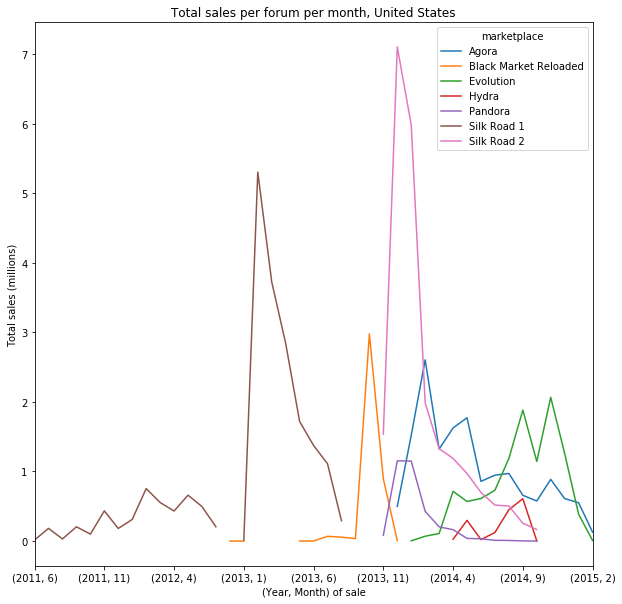

In [10]:
temp = us.groupby([us['first_observed'].dt.year, us['first_observed'].dt.month, us['marketplace']])
temp2 = temp.sum()/1000000
ax = temp2.unstack(level=-1)['total_sales'].plot(kind='line', figsize = (10,10), title='Total sales per forum per month, United States')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Total sales (millions)")

ax

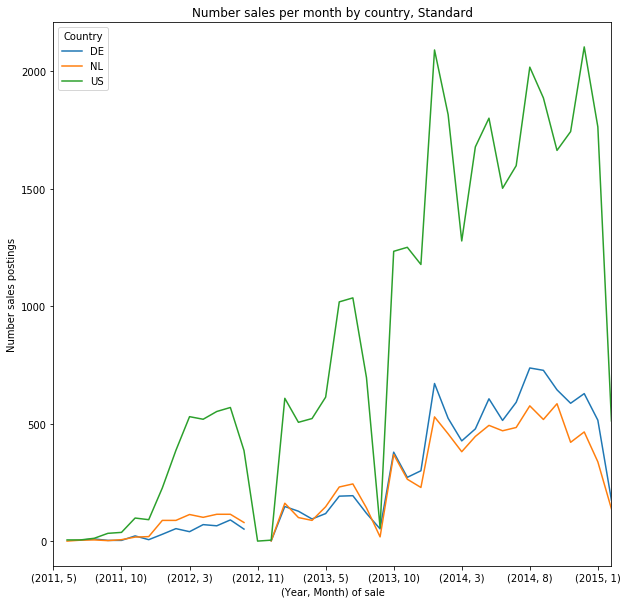

In [11]:
temp = df.groupby([df['first_observed'].dt.year, df['first_observed'].dt.month, df['Country']])
temp2 = temp.count()
ax = temp2.unstack(level=-1)['first_observed'].plot(kind='line', figsize = (10,10), title='Number sales per month by country, Standard')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Number sales postings")

ax

/Users/eebart/.envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/eebart/.envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/eebart/.envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

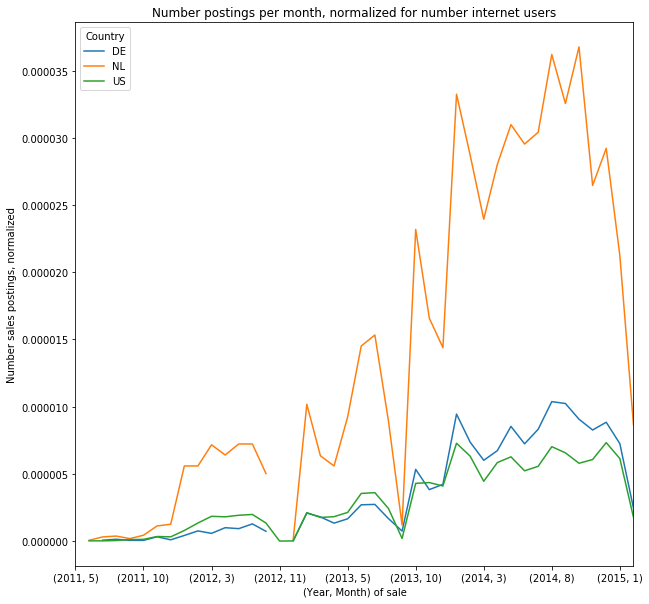

In [12]:
#Normalized
#NL Internet Users 15,915,076
#DE Internet Users 71,016,605
#US Internet Users 286,942,362

temp = df.groupby([df['first_observed'].dt.year, df['first_observed'].dt.month, df['Country']])
temp2 = temp.count().unstack(level=-1)

del temp2['prediction']
del temp2['marketplace']

temp2['first_observed']['DE'] = temp2['first_observed']['DE']/71016605
temp2['first_observed']['NL'] = temp2['first_observed']['NL']/15915076
temp2['first_observed']['US'] = temp2['first_observed']['US']/286942362

ax = temp2['first_observed'].plot(kind='line', figsize = (10,10),title='Number postings per month, normalized for number internet users')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Number sales postings, normalized")

ax

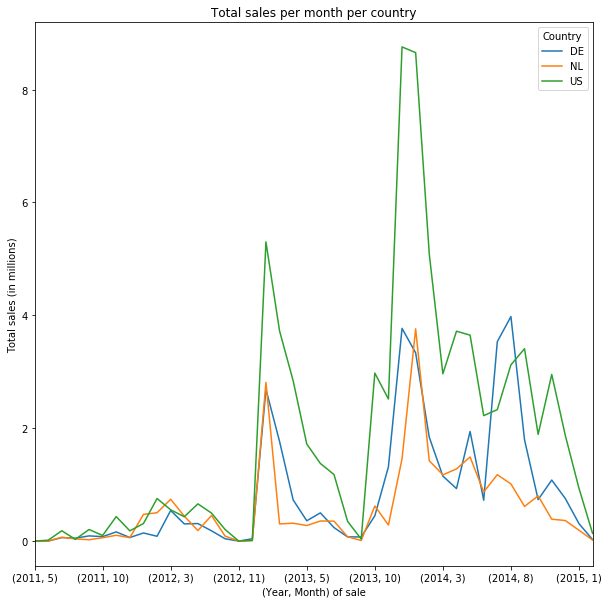

In [13]:
temp = df.copy()
del temp['prediction']
del temp['marketplace']
temp2 = temp.groupby([temp['first_observed'].dt.year, temp['first_observed'].dt.month, temp['Country']])

chartable = temp2.sum().unstack(level=-1).fillna(0) / 1000000
chartable
ax = chartable['total_sales'].plot(kind='line', figsize = (10,10),title='Total sales per month per country')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Total sales (in millions)")

ax

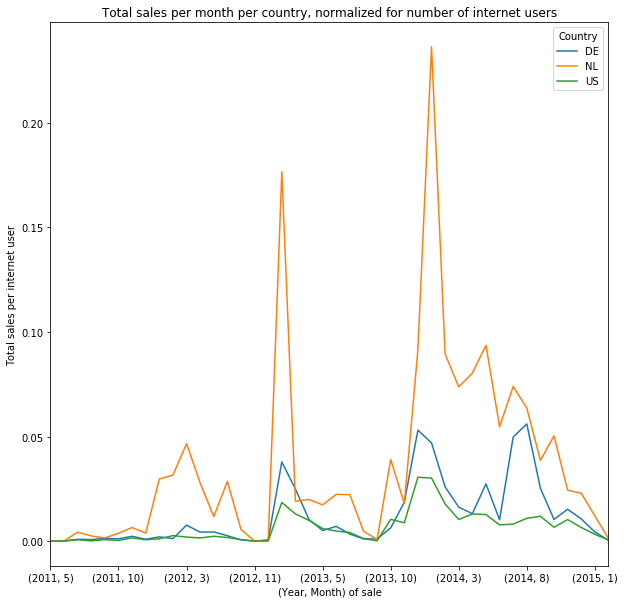

In [14]:
temp = df.copy()
del temp['prediction']
del temp['marketplace']
temp2 = temp.groupby([temp['first_observed'].dt.year, temp['first_observed'].dt.month, temp['Country']])

chartable = temp2.sum().unstack(level=-1).fillna(0)
chartable['total_sales']['DE'] = chartable['total_sales']['DE']/71016605
chartable['total_sales']['NL'] = chartable['total_sales']['NL']/15915076
chartable['total_sales']['US'] = chartable['total_sales']['US']/286942362

ax = chartable['total_sales'].plot(kind='line', figsize = (10,10),title='Total sales per month per country, normalized for number of internet users')

ax.set_xlabel("(Year, Month) of sale")
ax.set_ylabel("Total sales per internet user")

ax